In [33]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#download & display image

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names) #ชื่อเจ้าของใบหน้า
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


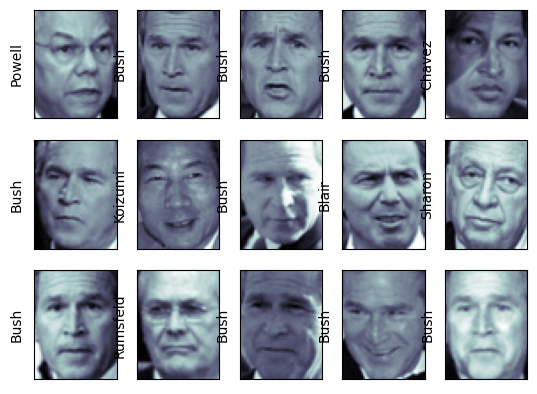

In [11]:
fig,ax = plt.subplots(3,5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],color='black')
plt.show()

In [25]:
#reduce model

pca = PCA(n_components=150,svd_solver="randomized",whiten=True)
svc = SVC(kernel='rbf',class_weight="balanced")

model = make_pipeline(pca,svc)

In [18]:
#train, test data
x_train, x_test, y_train, y_test = train_test_split(faces.data,faces.target,random_state=40)

In [19]:
param = {
    "svc__C":[1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005]
}

In [26]:
#train data to model
grid = GridSearchCV(model,param)
grid.fit(x_train, y_train)

print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.005}


In [29]:
print(grid.best_estimator_)

model = grid.best_estimator_

Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.005))])


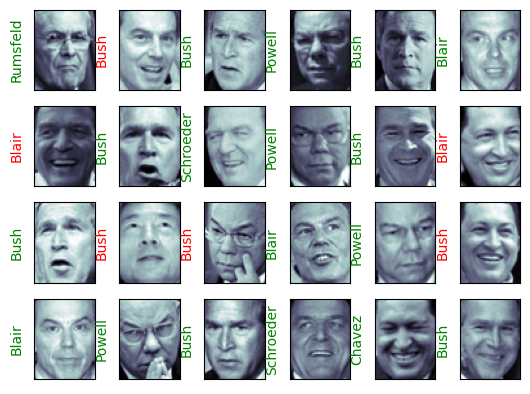

In [30]:
#predict
y_pred = model.predict(x_test)

#show real image & predict name
pig,ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
            color='green' if y_pred[i] == y_test[i] else 'red')
plt.show()

In [32]:
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  82.7893175074184


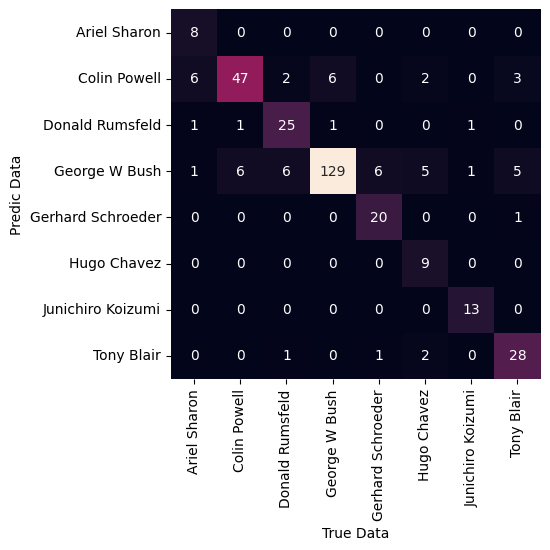

In [36]:
mat = confusion_matrix(y_test,y_pred)
sb.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
        xticklabels=faces.target_names,
        yticklabels=faces.target_names)
plt.xlabel("True Data")
plt.ylabel("Predic Data")
plt.show()